

### <center>Classificação: Identificando os Bandidos</center>
-----------------------------------------------------------------------------
Este notebook realiza o **processamento dos dados** e o **treinamento do modelo Naive Bayes** para prever o alinhamento 
dos super-heróis como **bom** ou **mau**. O foco está em transformar os dados, selecionar as colunas mais relevantes 
e avaliar o modelo com métricas de classificação.

## Etapas:
1. **Processamento dos Dados**:
   - Transformar colunas booleanas e nominais.
   - Calcular correlações e selecionar as melhores colunas para o modelo.
2. **Treinamento do Modelo**:
   - Usar o Naive Bayes para treinar o modelo com os dados processados.
3. **Avaliação e Salvamento do Modelo**:
   - Avaliar o modelo usando métricas como acurácia e matriz de confusão.
   - Salvar o modelo treinado para uso futuro.

##### **Importação das bibliotecas necessárias**


In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score, roc_curve
)
from imblearn.over_sampling import SMOTE  # Para oversampling
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Configurações do notebook
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

##### **Classificação**

Carregando o dataset processado...

Primeiras linhas do dataset:


,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Omniscient,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,False,True,False,False,False,True,False,False,False,False,...,False,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,True,True,False,False,True,True,False,False,False,False,...,False,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,False,False,True,False,False,False,False,False,False,False,...,False,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,False,True,False,False,False,False,False,False,False,False,...,False,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,False,False,False,True,False,False,False,False,True,False,...,False,Male,blue,Cosmic Entity,Black,183.0,Marvel Comics,-,bad,81.0



Processando os dados...


,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Skin color_grey,Skin color_orange,Skin color_orange / white,Skin color_pink,Skin color_purple,Skin color_red,Skin color_red / black,Skin color_silver,Skin color_white,Skin color_yellow
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
656,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
657,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
658,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Colunas selecionadas com alta correlação (> = 10%) para o modelo:
['Alignment', 'Hair color_Blond', 'Gender_Female', 'Eye color_blue', 'Invisibility', 'Race_New God', 'Natural Weapons', 'Power Suit', 'Insanity', 'Race_Cyborg', 'Eye color_red', 'Hair color_No Hair', 'Gender_Male', 'Super Strength', 'Weight', 'Publisher_Image Comics']


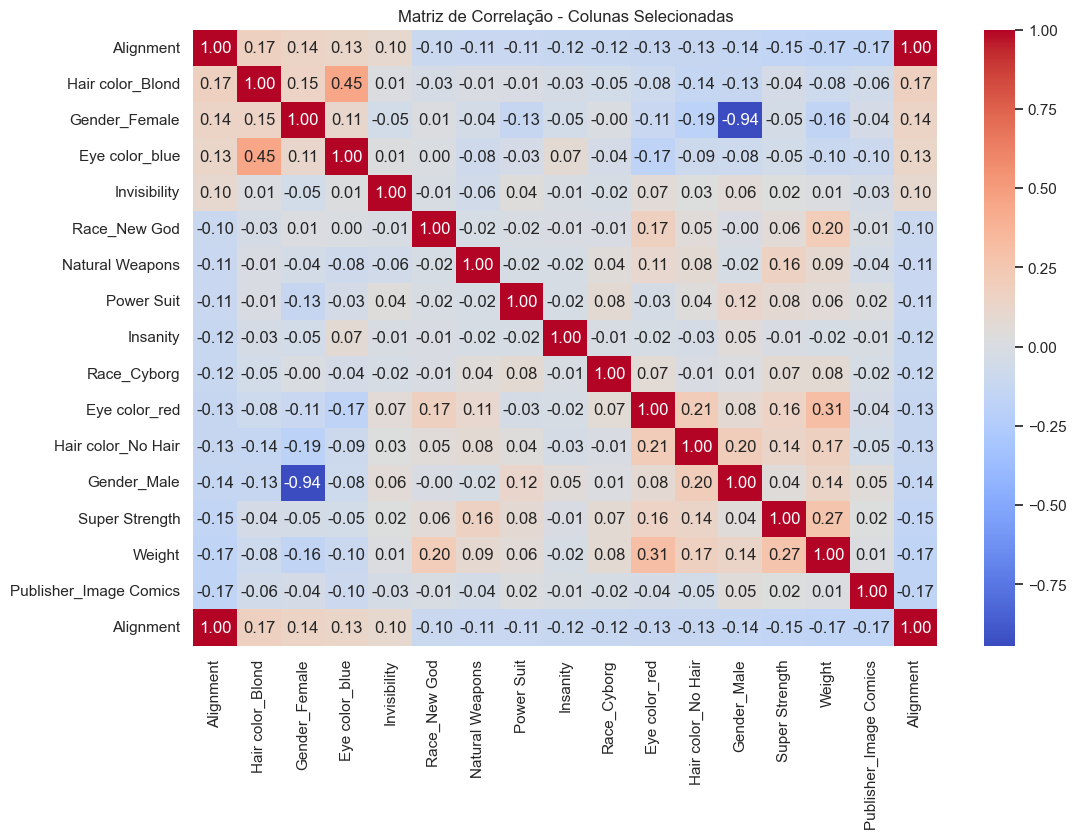


Distribuição das classes antes do balanceamento:
Alignment
1.0    435
0.0    194
Name: count, dtype: int64


C:\Users\Muchanga\AppData\Local\Temp\ipykernel_1264\3837349458.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='coolwarm')


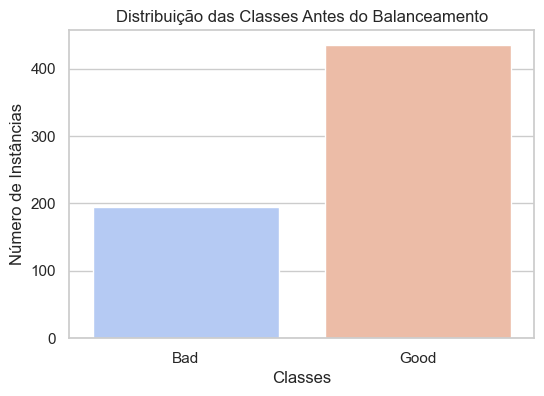


Desequilíbrio significativo detectado. Aplicando SMOTE...
Distribuição das classes após o balanceamento:
Alignment
1.0    435
0.0    435
Name: count, dtype: int64


C:\Users\Muchanga\AppData\Local\Temp\ipykernel_1264\3837349458.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y.value_counts().index, y=y.value_counts().values, palette='coolwarm')


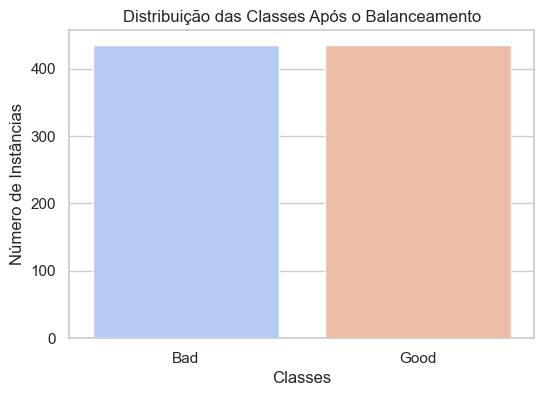


Dividindo os dados em treino e teste...
Tamanho do conjunto de treino: (696, 6)
Tamanho do conjunto de teste: (174, 6)

Treinando o modelo Naive Bayes...

Avaliando o modelo...

Relatório de Classificação:
              precision    recall  f1-score   support

         Bad       0.79      0.21      0.33        90
        Good       0.53      0.94      0.68        84

    accuracy                           0.56       174
   macro avg       0.66      0.58      0.50       174
weighted avg       0.66      0.56      0.50       174


Métricas de Avaliação:
Acurácia: 0.56
Precisão: 0.53
Revocação: 0.94
F1-Score: 0.68
ROC-AUC: 0.70


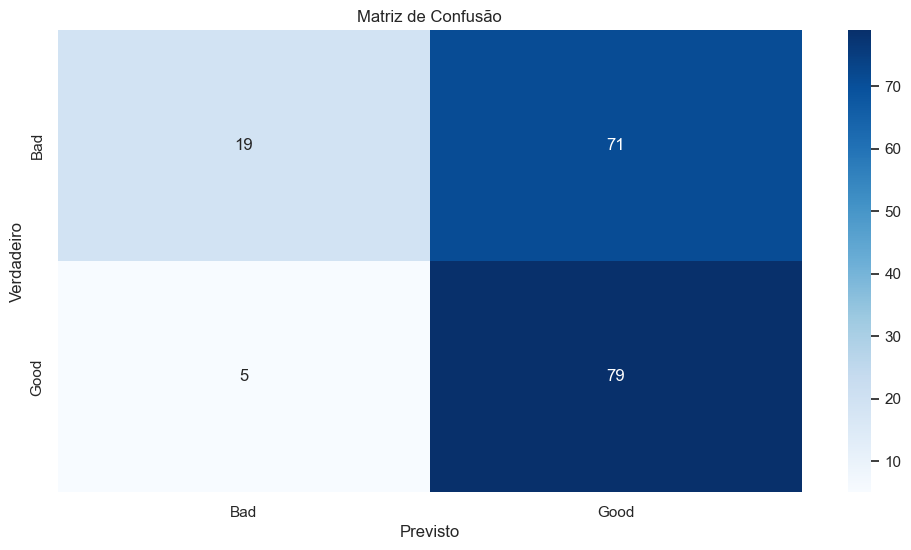

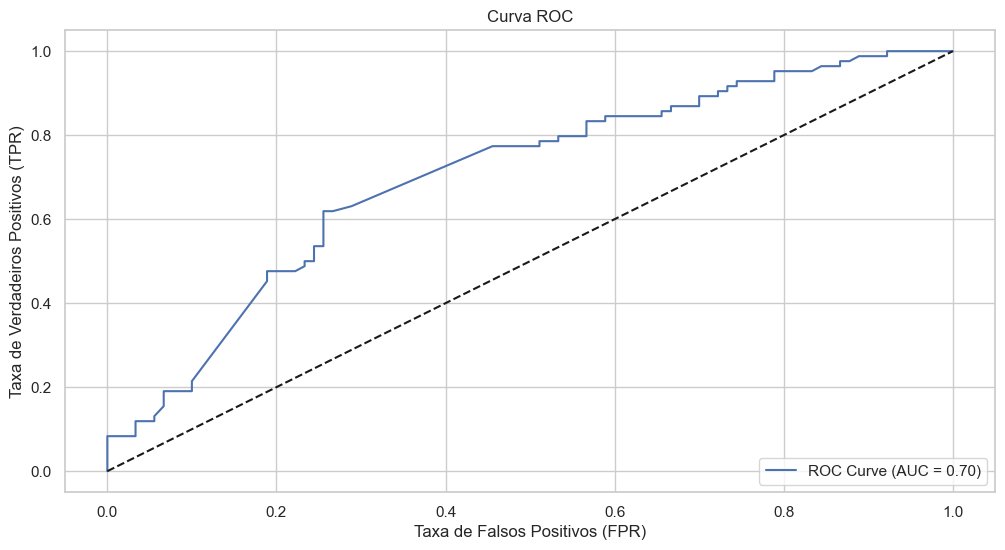


Salvando o modelo treinado...
Modelo salvo em: ../api/models/naive_bayes_alignment.pkl

Processamento, treinamento e avaliação concluídos!


In [ ]:
# 1. Carregamento do Dataset
print("Carregando o dataset processado...")
data = pd.read_csv('../data/processed/merged_data_cleaned.csv')
print("\nPrimeiras linhas do dataset:")
display(data.head())

# 2. Processamento dos Dados
print("\nProcessando os dados...")

# Transformar colunas nominais em dummies
# Converter variáveis categóricas em codificação numérica
categorical_columns = ['Gender', 'Eye color', 'Race', 'Hair color', 'Publisher', 'Skin color']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Converter colunas booleanas (True/False) para 0/1
boolean_columns = [col for col in data.columns if data[col].dropna().isin([True, False]).all()]
data[boolean_columns] = data[boolean_columns].astype(int)

# Garantir que 'Alignment' está codificado como 0 (bad) e 1 (good)
data['Alignment'] = data['Alignment'].map({'bad': 0, 'good': 1})

display(data)

# Calcular correlação com a variável alvo
correlation_matrix = data.corr()
alignment_correlation = correlation_matrix['Alignment'].sort_values(ascending=False)
#high_corr_features=alignment_correlation
# Selecionar colunas com mais de 80% de correlação
high_corr_features = alignment_correlation[(np.abs(alignment_correlation) >= 0.10)].index.tolist()

# Remover linhas onde 'Alignment' é NaN (por exemplo, neutros)
data = data.dropna(subset=['Alignment'])

print("\nColunas selecionadas com alta correlação (> = 10%) para o modelo:")
print(high_corr_features)

# Visualizar a matriz de correlação para as colunas selecionadas
plt.figure(figsize=(12, 8))
sns.heatmap(data[high_corr_features + ['Alignment']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação - Colunas Selecionadas")
plt.show()

# 3. Preparar os dados para o modelo
# Selecionando as variaveis não dummy para compor o modelo
high_corr_features=['Invisibility', 'Natural Weapons', 'Power Suit', 'Insanity', 'Super Strength', 'Weight']
X = data[high_corr_features]
y = data['Alignment']

# 4. Verificar o equilíbrio das classes
print("\nDistribuição das classes antes do balanceamento:")
class_distribution = y.value_counts()
print(class_distribution)

# Visualizar a distribuição das classes
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='coolwarm')
plt.title("Distribuição das Classes Antes do Balanceamento")
plt.xlabel("Classes")
plt.ylabel("Número de Instâncias")
plt.xticks([0, 1], ['Bad', 'Good'])
plt.show()

# Verificar se há desequilíbrio significativo
if class_distribution.min() / class_distribution.max() < 0.5:
    print("\nDesequilíbrio significativo detectado. Aplicando SMOTE...")
    smote = SMOTE(random_state=42)
    X, y = smote.fit_resample(X, y)
    print("Distribuição das classes após o balanceamento:")
    print(y.value_counts())
    
    # Visualizar a nova distribuição
    plt.figure(figsize=(6, 4))
    sns.barplot(x=y.value_counts().index, y=y.value_counts().values, palette='coolwarm')
    plt.title("Distribuição das Classes Após o Balanceamento")
    plt.xlabel("Classes")
    plt.ylabel("Número de Instâncias")
    plt.xticks([0, 1], ['Bad', 'Good'])
    plt.show()
else:
    print("\nAs classes estão equilibradas. Não é necessário aplicar SMOTE.")

# 5. Divisão dos Dados em Treino e Teste
print("\nDividindo os dados em treino e teste...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")

# 6. Treinamento do Modelo
print("\nTreinando o modelo Naive Bayes...")
model = GaussianNB()
model.fit(X_train, y_train)

# 7. Avaliação do Modelo
print("\nAvaliando o modelo...")
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilidades para a classe positiva

# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=['Bad', 'Good']))

# Métricas de Avaliação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"\nMétricas de Avaliação:")
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Revocação: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.show()

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Linha de referência
plt.title("Curva ROC")
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.legend(loc="lower right")
plt.show()

# 8. Salvamento do Modelo
print("\nSalvando o modelo treinado...")
model_path = '../streamlit/models/naive_bayes_alignment.pkl'
joblib.dump(model, model_path)
print(f"Modelo salvo em: {model_path}")

# Finalização
print("\nProcessamento, treinamento e avaliação concluídos!")

##### 1. Quais hipóteses assumimos ao usar o algoritmo Naive Bayes?

O algoritmo Naive Bayes faz as seguintes suposições:
1. **Independência Condicional**:
   - As features são consideradas independentes umas das outras, dado o valor da variável alvo (`Alignment`).
   - Essa suposição raramente é verdadeira, mas simplifica os cálculos.
2. **Distribuição das Features**:
   - `GaussianNB` assume que as features seguem uma distribuição normal (gaussiana).
3. **Relevância das Features**:
   - Todas as features contribuem igualmente para a previsão. No entanto, variáveis irrelevantes ou ruidosas podem prejudicar o modelo.

Essas hipóteses podem não ser completamente válidas para este conjunto de dados, especialmente porque algumas features podem ser correlacionadas ou não seguirem uma distribuição normal.

---

##### 2. Como as características específicas deste conjunto de dados influenciam suas escolhas e resultados de modelagem?

1. **Desequilíbrio Inicial das Classes**:
   - Antes de aplicar o **SMOTE**, havia um desequilíbrio significativo entre "Good" e "Bad".
   - O oversampling ajudou a balancear as classes, mas pode ter introduzido amostras sintéticas irreais.

2. **Features Selecionadas**:
   - Apenas 6 features foram usadas (`Invisibility`, `Natural Weapons`, `Power Suit`, `Insanity`, `Super Strength`, `Weight`).
   - Isso reduz a complexidade do modelo, mas pode limitar o desempenho se outras variáveis relevantes não forem incluídas.

3. **Limitações do Naive Bayes**:
   - O Naive Bayes é simples e eficiente, mas não captura bem interações complexas entre features.

---

#### 3. Como você avalia os resultados?

### Resultados do Modelo:
- **Tamanho do conjunto de treino**: 696 instâncias.
- **Tamanho do conjunto de teste**: 174 instâncias.

#### **Métricas de Avaliação:**
- **Acurácia**: 56%
  - O modelo está correto em 56% das previsões.
- **Precisão para "Good"**: 53%
  - Apenas metade das previsões para "Good" estão corretas.
- **Recall para "Good"**: 94%
  - O modelo identificou quase todos os verdadeiros "Good".
- **F1-Score para "Good"**: 68%
  - Combinação harmônica de precisão e recall.
- **ROC-AUC**: 0.70
  - Desempenho razoável em distinguir entre as classes.

#### **Classe "Bad":**
- **Precisão**: 79%
  - A maioria das previsões para "Bad" estão corretas.
- **Recall**: 21%
  - O modelo identificou apenas 21% dos verdadeiros "Bad".
- **F1-Score**: 33%
  - Baixo desempenho geral para a classe "Bad".

### Interpretação:
- O modelo tem **bom recall para "Good"**, mas **desempenho limitado na classe "Bad"**.
- O **ROC-AUC** de 0.70 indica que o modelo é moderadamente bom em separar as classes.
